In [1]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import itertools

# My solution

In [2]:
def make_sum_combination_list(tab, k):
    """
    Returns the sums combinations of tab elements for a given k number
    Returns a list of tuples
    tab: a list of integers
    k: an integer
    """
    list_ = []
    for i in range(int(len(tab))):
        if k >= tab[i]:
            if k - tab[i] in tab and (tab[i],k-tab[i]) not in list_ and (k-tab[i],tab[i]) not in list_:
                list_.append((tab[i],k-tab[i]))
                if tab[i] == k - tab[i] and tab.count(tab[i]) == 1:
                    list_.remove((tab[i],tab[i]))
    return list_

Example case

In [3]:
make_sum_combination_list([1,4,9,6,5,3,7,2], 8)

[(1, 7), (6, 2), (5, 3)]

Other example

In [4]:
make_sum_combination_list([5,3,10,6,5,2,10,6,8,6,6,10,8,2,9,7,4,7,3,1], 6)

[(5, 1), (3, 3), (2, 4)]

## Code explanation

### Complexity

Since my function contains 1 for loop we can assume that the complexity for a list of n elements will be O(n)

### If statements explanations

The first If statement checks if the value in the array is higher than k: if it is the case, there is no need to go further since all the numbers in the array are positive.

The second If statement is divided into 3 parts:

    > the first part checks if the complementary number is present in the array (if tab[i] = 3, there must be a 5 in the array)
    > the second and third parts check if combinations have already been appended in the combination list and if it's the case, there is no need to append it to the combination list again (ex: if (3,5) is in the combination list, no need to add it again and no need to add (5,3))
    
The second If statement checks the case where tab[i] = k/2. In this case the 2 if conditions are not enough and there is a need to check if the count of k/2 elements in the list is higher or equal to 2. In the code the If statement checks if the count is equal to 1 to delete the wrong combination from the combination list. In the given example ([1,4,9,6,5,3,7,2]) the first If statement allows to append (4,4) in the combination list but the second If statement removes it since [1,4,9,6,5,3,7,2].count(4) == 1

### Graphic representation

In [5]:
number_samples = [10,25,50,75,100,250,500,750,1000,2500,5000,7500,10000,25000,50000,75000,100000]
k_values = [random.randint(0,10), random.randint(10,100), random.randint(100,500), random.randint(500,1000)]
times_array = [[] for i in range(len(k_values))] # contains all the executions' times
combinations = [[] for i in range(len(k_values))]# flag to check all the combinations generated

index = 0
for k in k_values:
    for number in number_samples:
        start = time.time()
        combinations[index].append(make_sum_combination_list([random.randint(0,1000) for i in range(number)], k))
        end = time.time()
        times_array[index].append(end-start)
    index += 1

<IPython.core.display.Javascript object>


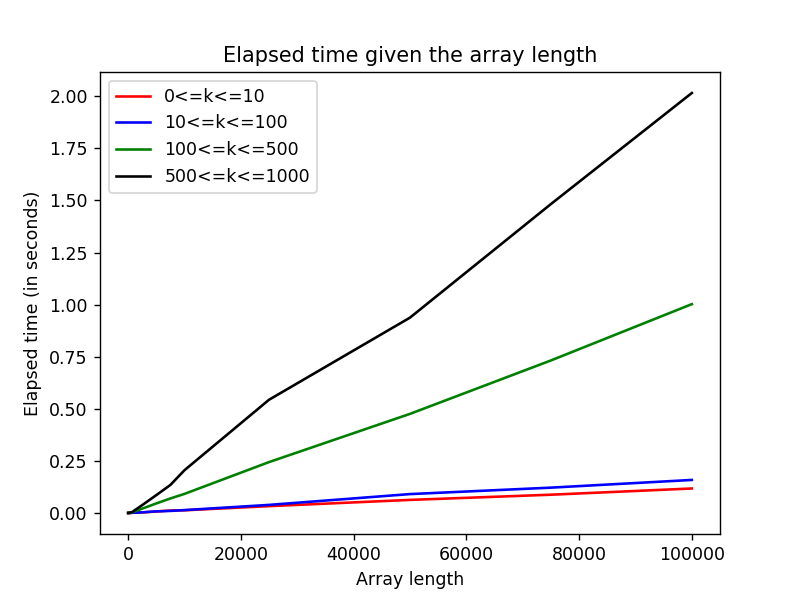

In [6]:
%matplotlib notebook
plt.plot(number_samples, times_array[0], label="0<=k<=10",color='red')
plt.plot(number_samples, times_array[1], label="10<=k<=100",color='blue')
plt.plot(number_samples, times_array[2], label="100<=k<=500",color='green')
plt.plot(number_samples, times_array[3], label="500<=k<=1000",color='black')
plt.xlabel('Array length')
plt.ylabel('Elapsed time (in seconds)')
plt.title('Elapsed time given the array length')
plt.legend()
plt.show()

Here we can see that my method always has an O(n) shape.

It seems that the value of k seems to have a big influence over the computation time: the higher it gets, the higher the number of different combinations gets, the longer the computation is.

Note: I put "random.randint(0,1000)" on purpose in the for loop. I wanted all the samples to compute with this common variable.

# Other method

This method isn't mine: I found it on StackOverflow (here: https://stackoverflow.com/questions/34517540/find-all-combinations-of-a-list-of-numbers-with-a-given-sum)

I implemented it here (and modified it a little to make it fit to the exercice) to make a comparison with my method.

I found it interesting to compare it to my method because it uses a specialized library to do this type of computation.

In [7]:
def make_sum_combination_list_v2(tab, k):
    dictionary = {}
    sequences = [seq for i in range(len(tab), 0, -1) for seq in itertools.combinations(tab, 2) if sum(seq) == k]
    dictofcombinations = {i : None for i in sequences}
    return list(dictofcombinations.keys())

Example case

In [8]:
make_sum_combination_list_v2([1,4,9,6,5,3,7,2], 8)

[(1, 7), (6, 2), (5, 3)]

Other example

In [9]:
make_sum_combination_list_v2([5,3,10,6,5,0,10,6,8,6,6,10,8,2,9,7,4,7,3,1], 6)

[(5, 1), (3, 3), (6, 0), (0, 6), (2, 4)]

### Graphic representation

In [10]:
number_samples = [10,25,50,75,100,250,500,750,1000] #,2500],5000,7500,10000,25000,50000,75000,100000]
k = random.randint(0,10000)
times = []

for number in number_samples:
    start = time.time()
    make_sum_combination_list_v2([random.randint(0,10000) for i in range(number)], k)
    end = time.time()
    times.append(end-start)
    
# calculating the O(n) trendline
x = [0,20,40,60,80,100]
y = [0,200,400,600,800,1000]

<IPython.core.display.Javascript object>


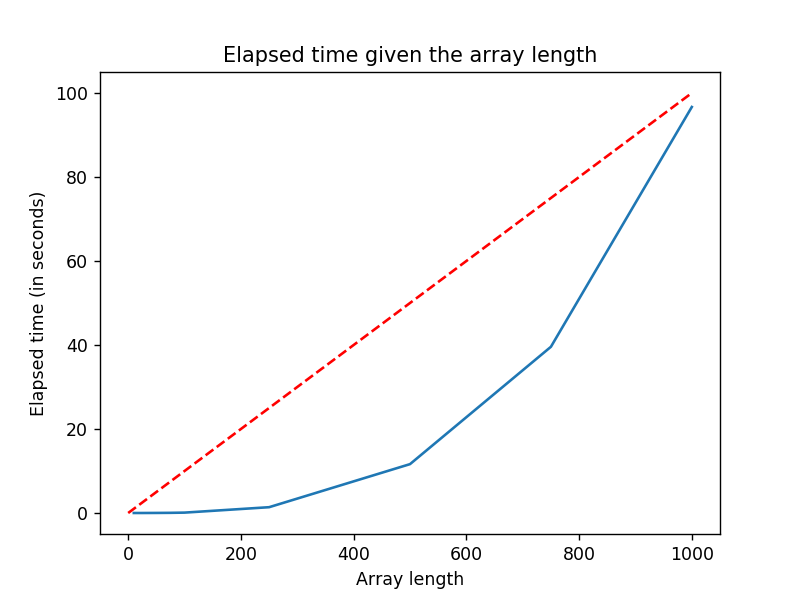

In [11]:
%matplotlib notebook
plt.plot(number_samples, times)
plt.plot(y,x,"r--")
plt.xlabel('Array length')
plt.ylabel('Elapsed time (in seconds)')
plt.title('Elapsed time given the array length')
plt.show()

This method has long data processing and is beaten by O(n) curve around 950 as array length.